# Task 2: Local Histogram Equalization
1. Implement the original histogram equalization method histogram equalization. (5 points)
2. Implement the local histogram equalization method local histogram equalization. (10 points)
3. Save and compare the result from the local histogram equalization method to the original_histogram_equalization result. (5 points)


In [8]:
import os.path as osp

import cv2
import numpy as np

## Implement the original histogram equalization method histogram equalization.

In [9]:
def histogram_equalization(img):
    """Returns the image after histogram equalization.
    Args:
        img: the input image to be executed for histogram equalization.
    Returns:
        res_img: the output image after histogram equalization.
    """
    # TODO: implement the histogram equalization function.
    # Placeholder that you can delete. An image with all zeros.
    res_img = np.zeros_like(img)
    # 计算直方图
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])

    # 计算累积分布函数 (CDF)
    cdf = hist.cumsum()  # 累加直方图值
    cdf_normalized = cdf * (255 / cdf[-1])  # 归一化到[0,255]

    # 利用CDF对灰度值进行映射
    res_img = np.interp(img.flatten(), bins[:-1], cdf_normalized).reshape(img.shape).astype(np.uint8)
    
    return res_img.astype(np.uint8)

## Implement the local histogram equalization method local histogram equalization.

In [10]:
def local_histogram_equalization_1(img, kernel_size = 32):
    """Returns the image after local histogram equalization.
    Args:
        img: the input image to be executed for local histogram equalization.
    Returns:
        res_img: the output image after local histogram equalization.
    """
    # TODO: implement the local histogram equalization function.
    # Placeholder that you can delete. An image with all zeros.
    res_img = np.zeros_like(img)
    h, w = img.shape
    # 对图像按块进行局部直方图均衡化
    for i in range(0, h, kernel_size):
        for j in range(0, w, kernel_size):
            # 提取当前块
            block = img[i:i+kernel_size, j:j+kernel_size]
            
            # 应用全局直方图均衡化的步骤到每个块
            hist, bins = np.histogram(block.flatten(), 256, [0, 256])
            cdf = hist.cumsum()
            cdf_normalized = cdf * (hist.max() / cdf.max())
            equalized_block = np.interp(block.flatten(), bins[:-1], cdf_normalized).reshape(block.shape).astype(np.uint8)
            
            # 将均衡化后的块放回图像
            res_img[i:i+kernel_size, j:j+kernel_size] = equalized_block
    # res_img = histogram_equalization(res_img)
    return res_img

In [11]:
def local_histogram_equalization(img, kernel_size = 32):
    """Returns the image after local histogram equalization.
    Args:
        img: the input image to be executed for local histogram equalization.
    Returns:
        res_img: the output image after local histogram equalization.
    """
    # TODO: implement the local histogram equalization function.
    # Placeholder that you can delete. An image with all zeros.
    res_img = np.zeros_like(img)
    h, w = img.shape
    k_half = kernel_size // 2
    # 对图像按块进行局部直方图均衡化
    for i in range(h):
        for j in range(w):
            # 提取当前块
            min_row, max_row = max(0, i - k_half), min(i, i + k_half + 1)
            min_col, max_col = max(0, j - k_half), min(j, j + k_half + 1)
            block = img[min_row:max_row, min_col:max_col]
            
            # 应用全局直方图均衡化的步骤到每个块
            hist, bins = np.histogram(block.flatten(), 256, [0, 256])
            cdf = hist.cumsum()
            cdf_normalized = cdf * (255 / cdf.max())
            
            # 将均衡化后的块放回图像
            res_img[i, j] = np.interp(img[i, j], bins[:-1], cdf_normalized)
    # res_img = histogram_equalization(res_img)
    return res_img

## Plot the image and its histogram

In [12]:
from matplotlib import pyplot as plt
from skimage import data
from skimage.util.dtype import dtype_range
from skimage import exposure

def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins)
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')

    xmin, xmax = dtype_range[image.dtype.type]
    ax_hist.set_xlim(xmin, xmax)

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')

    return ax_img, ax_hist, ax_cdf

## Test

In [13]:
img = cv2.imread("images/moon.png", cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

res_hist_equalization = histogram_equalization(img)
kernel_size = 60
res_local_hist_equalization = local_histogram_equalization(img, kernel_size=kernel_size)

cv2.imwrite("results/HistEqualization.jpg", res_hist_equalization)
cv2.imwrite("results/LocalHistEqualization-{}.jpg".format(kernel_size), res_local_hist_equalization)

C:\Users\docking\AppData\Local\Temp\ipykernel_21176\1993684748.py:24: RuntimeWarning: divide by zero encountered in longlong_scalars
  cdf_normalized = cdf * (255 / cdf.max())
C:\Users\docking\AppData\Local\Temp\ipykernel_21176\1993684748.py:24: RuntimeWarning: invalid value encountered in multiply
  cdf_normalized = cdf * (255 / cdf.max())


True

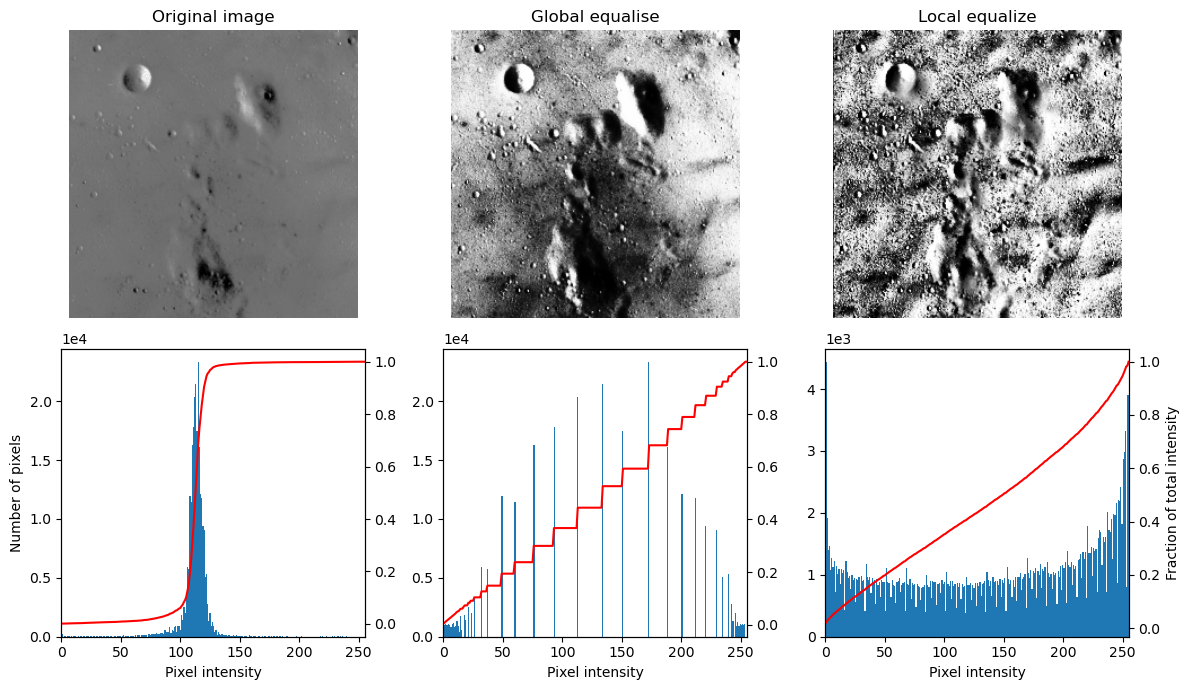

In [14]:
# Plot the images and their histograms
# fig, axes = plt.figure(2, 3, figsize=(12, 7.5))
fig = plt.figure(figsize=(12, 7))
axes = np.zeros((2, 3), dtype=object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Original image')
ax_hist.set_ylabel('Number of pixels')

ax1_img, ax1_hist, ax1_cdf = plot_img_and_hist(res_hist_equalization, axes[:, 1])
ax1_img.set_title('Global equalise')

ax2_img, ax2_hist, ax2_cdf = plot_img_and_hist(res_local_hist_equalization, axes[:, 2])
ax2_img.set_title('Local equalize')
ax2_cdf.set_ylabel('Fraction of total intensity')


# prevent overlap of y-axis labels
fig.tight_layout()
